In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pickle

# uncomment the following to generate publication ready figures
# plt.rcParams.update({
#     "figure.figsize": (8, 6),
#     "figure.dpi": 300,
#     "axes.labelsize": 16,      
#     "axes.titlesize": 16,
#     "xtick.labelsize": 16,
#     "ytick.labelsize": 16,
#     "legend.fontsize": 16,
#     "axes.linewidth": 2.0,
#     "font.size": 16
# })

In [8]:
def plot_boxplot(data, ylabel=""):
    plt.clf()
    ax = plt.gca()    
    labels = []
    measurements = []
    for k,v in data.items():
        measurements.append(v)
        labels.append(k)

    avg_measurements = [np.mean(m) for m in measurements]
    x = np.arange(len(labels))  # x-axis positions

    # bar plot
    ax.bar(x, avg_measurements, capsize=5,
           color='white', edgecolor='black', linewidth=2.0, width=0.6, zorder=2)

    # annotate mean values on top of bars
    for i, val in enumerate(avg_measurements):
        ax.text(x[i], val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=14)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=25)
    ax.set_ylabel(ylabel)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

    plt.tight_layout()
    plt.show()

In [9]:
# get data

## PRM
prm_file = "../data/benchmark_prm.pkl"
prm = None
with open(prm_file, "rb") as f:
    prm = pickle.load(f)

## PRM w/ shortcutting
prm_w_shortcutting_file = "../data/benchmark_prm_w_shortcutting.pkl"
prm_w_shortcutting = None
with open(prm_w_shortcutting_file, "rb") as f:
    prm_w_shortcutting = pickle.load(f)

## GCS-6, GCS-12 and GCS-18
gcs_6_data_file = "../data/benchmark_gcs_6.pkl"
gcs_6_data = None
with open(gcs_6_data_file, "rb") as f:
    gcs_6_data = pickle.load(f)
gcs_12_data_file = "../data/benchmark_gcs_12.pkl"
gcs_12_data = None
with open(gcs_12_data_file, "rb") as f:
    gcs_12_data = pickle.load(f)
gcs_18_data_file = "../data/benchmark_gcs_18.pkl"
gcs_18_data = None
with open(gcs_18_data_file, "rb") as f:
    gcs_18_data = pickle.load(f)

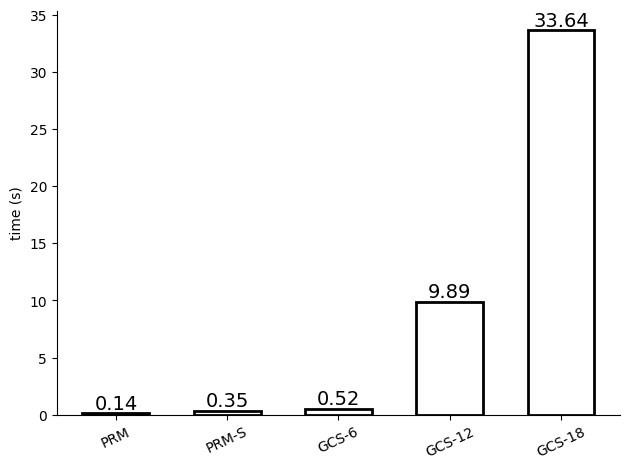

In [7]:
execution_times = {
    "PRM" : prm["time"],
    "PRM-S" : prm_w_shortcutting["time"],
    "GCS-6" : gcs_6_data["run_time"],
    "GCS-12" : gcs_12_data["run_time"],
    "GCS-18" : gcs_18_data["run_time"],
}

plot_boxplot(execution_times, ylabel="time (s)")

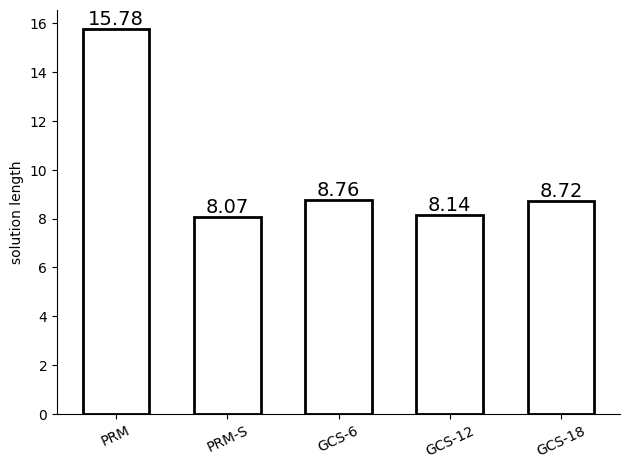

In [10]:
solution_costs = {
    "PRM" : prm["solution_length"],
    "PRM-S" : prm_w_shortcutting["solution_length"],
    "GCS-6" : gcs_6_data["rounded_cost"],
    "GCS-12" : gcs_12_data["rounded_cost"],
    "GCS-18" : gcs_18_data["rounded_cost"],
}

plot_boxplot(solution_costs, ylabel="solution length")